# Bayesian Inference

## Updating probabilities based on new information

In [1]:
# Numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


from IPython.core.pylabtools import figsize

# Plotting styling
import json
s = json.load(open('../style/bmh_matplotlibrc.json'))
matplotlib.rcParams.update(s)
matplotlib.rcParams['figure.figsize'] = (10, 3)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['ytick.major.size'] = 20

In [2]:
# Logistic Parameters from Markov Chain Monte Carlo Notebook
alpha = 0.977400
beta = -0.067270

In [3]:
# likelihoods

# P(light | sleep)
light_sleep = 0.01

# P(-light | sleep)
nolight_sleep = 0.99

# P(light | -sleep)
light_nosleep = 0.8

# P(-light | -sleep)
nolight_nosleep = 0.2

# P(phone | sleep) 
phone_sleep = 0.95

# P(-phone | sleep)
nophone_sleep = 0.05

# P(phone | -sleep)
phone_nosleep = 0.25

# P(-phone | -sleep)
nophone_nosleep = 0.75

In [4]:
def calculate_prior(time, alpha, beta):
    p = 1.0 / (1.0 + np.exp(np.dot(beta, time) + alpha))
    return p

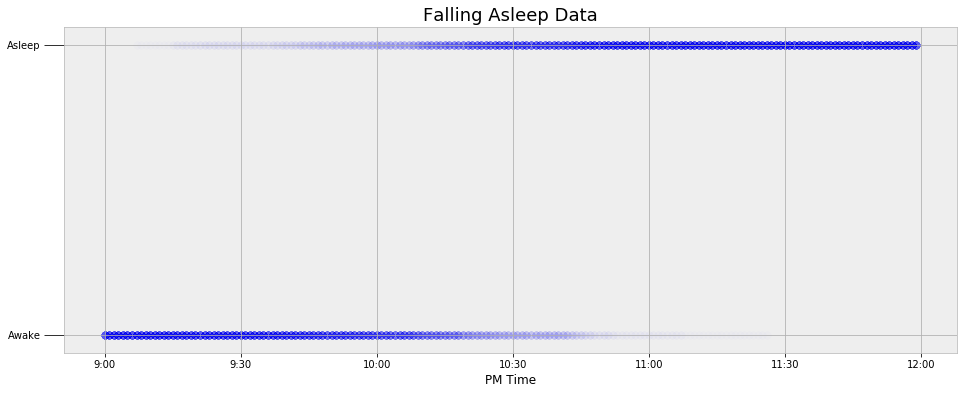

In [5]:
# Data formatted in different notebook
sleep_data = pd.read_csv('../markov_chain_monte_carlo/data/sleep_data.csv')

# Labels for plotting
sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']

figsize(16, 6)

# Sleep data
plt.scatter(sleep_data['time_offset'], sleep_data['indicator'], 
            s= 60, alpha=0.01, facecolor = 'b', edgecolors='b')
plt.yticks([0, 1], ['Awake', 'Asleep']); plt.xlabel('PM Time'); 
plt.title('Falling Asleep Data', size = 18)
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

In [6]:
# Sort the values by time offset
sleep_data.sort_values('time_offset', inplace=True)

# Time is the time offset
time = np.array(sleep_data.loc[:, 'time_offset'])

# Observations are the indicator
sleep_obs = np.array(sleep_data.loc[:, 'indicator'])

In [7]:
# Time values for probability prediction
time_est = np.linspace(time.min()- 5, time.max() + 5, 1e3)[:, None]

# Probability at each time using mean values of alpha and beta
sleep_est = calculate_prior(time_est, alpha, beta)

# Prior Distribution of Sleep as a Function of Time

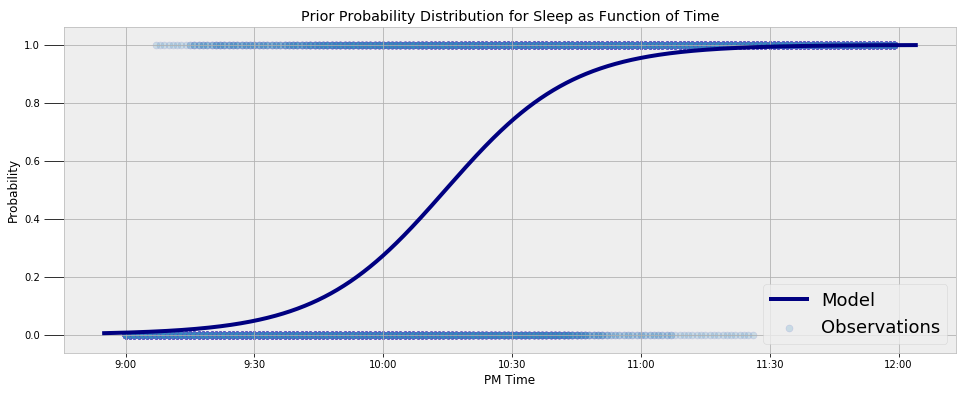

In [8]:
figsize(16, 6)

plt.plot(time_est, sleep_est, color = 'navy', 
         lw=4, label="Model")
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=50, alpha=0.2, label='Observations')
plt.title('Prior Probability Distribution for Sleep as Function of Time');
plt.legend(prop={'size':18})
plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

In [10]:
print('The probability of sleep increases to above 50% at 10:{} PM.\n'.format(int(time_est[np.where(sleep_est > 0.5)[0][0]][0])))

print('9:30  PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(-30, alpha, beta)))
print('10:00 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(0, alpha, beta)))
print('10:30 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(30, alpha, beta)))

The probability of sleep increases to above 50% at 10:14 PM.

9:30  PM probability of being asleep: 4.76%.
10:00 PM probability of being asleep: 27.34%.
10:30 PM probability of being asleep: 73.90%.


## Updated Probability with Light Data

In [11]:
def update_probability(time_offset, light):
    # Calculate the prior for the time
    prior_probability = calculate_prior(time_offset, alpha, beta)
    
    # Account for evidence
    if light == 0:
        likelihood = nolight_sleep
        non_likelihood = nolight_nosleep
    elif light == 1:
        likelihood = light_sleep
        non_likelihood = light_nosleep
        
    numerator = likelihood * prior_probability
    denominator = (likelihood * prior_probability) + (non_likelihood * (1 - prior_probability))
    
    conditional_probability = numerator / denominator
    
    
    if type(time_offset) == int:
        time = pd.datetime(2017, 1, 1, 10, 0, 0)
        new_time = str((time + pd.DateOffset(minutes = time_offset)).time())
        if light == 0:
            print('Time: {} PM \tLight is OFF.'.format(new_time))
        elif light == 1:
            print('Time: {} PM \tLight is ON.'.format(new_time))
    
        print('\nThe prior probability of sleep:    {:.2f}%'.format(100 * prior_probability))
        print('The updated probability of sleep:  {:.2f}%'.format(100 * conditional_probability))
    
    return conditional_probability

In [12]:
result = update_probability(time_offset = 30, light = 1)

Time: 10:30:00 PM 	Light is ON.

The prior probability of sleep:    73.90%
The updated probability of sleep:  3.42%


In [13]:
result = update_probability(time_offset = -30, light = 0)

Time: 09:30:00 PM 	Light is OFF.

The prior probability of sleep:    4.76%
The updated probability of sleep:  19.84%


In [14]:
results = update_probability(time_offset = -15, light = 0)

Time: 09:45:00 PM 	Light is OFF.

The prior probability of sleep:    12.06%
The updated probability of sleep:  40.44%


In [15]:
light_on_prob = update_probability(time_est, light = 1)
light_off_prob = update_probability(time_est, light = 0)

## Visualize Probability with light

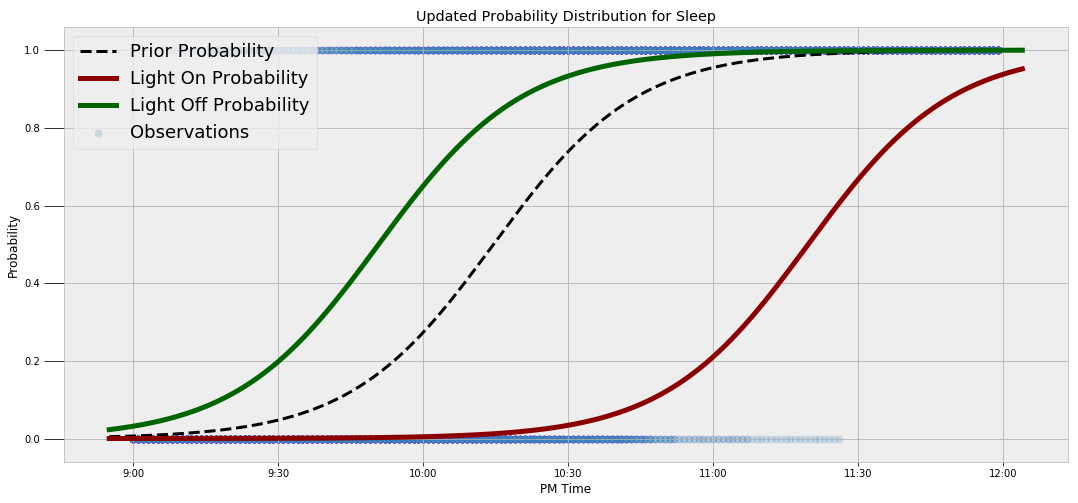

In [16]:
figsize(18, 8)

plt.plot(time_est, sleep_est, color = 'black', 
         lw=3, linestyle = '--', label="Prior Probability")
plt.plot(time_est, light_on_prob, color = 'darkred',
          lw = 5, label = 'Light On Probability')
plt.plot(time_est, light_off_prob, color = 'darkgreen',
           lw = 5, label = 'Light Off Probability')
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=50, alpha=0.2, label='Observations')
plt.title('Updated Probability Distribution for Sleep');
plt.legend(prop={'size':18}, loc=2)
plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

# Light and Phone Charging Information

In [17]:
def add_update_probability(time_offset, light, phone):
    # Calculate the prior for the time
    prior_probability = calculate_prior(time_offset, alpha, beta)
    
    # Account for evidence
    if light == 0:
        l_likelihood = nolight_sleep
        l_non_likelihood = nolight_nosleep
        l_status = 'OFF'
    
    elif light == 1:
        l_likelihood = light_sleep
        l_non_likelihood = light_nosleep
        l_status= 'ON'
        
    if phone == 0:
        p_likelihood = nophone_sleep
        p_non_likelihood = nophone_nosleep
        p_status = 'NOT charging'
    
    elif phone == 1:
        p_likelihood = phone_sleep
        p_non_likelihood = phone_nosleep
        p_status = 'charging'
    
    numerator = l_likelihood * p_likelihood * prior_probability
    denominator = (l_likelihood * p_likelihood * prior_probability) + (l_non_likelihood * p_non_likelihood * (1 - prior_probability))
    
    conditional_probability = numerator / denominator
    
    if type(time_offset) == int:
        time = pd.datetime(2017, 1, 1, 10, 0, 0)
        new_time = str((time + pd.DateOffset(minutes = time_offset)).time())
        
        print('Time is {} PM \tLight is {} \tPhone IS {}.'.format(
                new_time, l_status, p_status))
        
        print('\nThe prior probability of sleep:    {:.2f}%'.format(100 * prior_probability))
        print('The updated probability of sleep:  {:.2f}%'.format(100 * conditional_probability))
    
    return conditional_probability

In [18]:
result = add_update_probability(-15, 1, 1)

Time is 09:45:00 PM 	Light is ON 	Phone IS charging.

The prior probability of sleep:    12.06%
The updated probability of sleep:  0.65%


In [19]:
result = add_update_probability(-15, 1, 0)

Time is 09:45:00 PM 	Light is ON 	Phone IS NOT charging.

The prior probability of sleep:    12.06%
The updated probability of sleep:  0.01%


In [20]:
result = add_update_probability(60, 1, 0)

Time is 11:00:00 PM 	Light is ON 	Phone IS NOT charging.

The prior probability of sleep:    95.52%
The updated probability of sleep:  1.74%


In [21]:
result = add_update_probability(15, 0, 1)

Time is 10:15:00 PM 	Light is OFF 	Phone IS charging.

The prior probability of sleep:    50.79%
The updated probability of sleep:  95.10%


In [22]:
result = add_update_probability(30, 1, 0)

Time is 10:30:00 PM 	Light is ON 	Phone IS NOT charging.

The prior probability of sleep:    73.90%
The updated probability of sleep:  0.24%


In [23]:
result = add_update_probability(30, 0, 0)

Time is 10:30:00 PM 	Light is OFF 	Phone IS NOT charging.

The prior probability of sleep:    73.90%
The updated probability of sleep:  48.30%


In [24]:
result = add_update_probability(30, 0, 1)

Time is 10:30:00 PM 	Light is OFF 	Phone IS charging.

The prior probability of sleep:    73.90%
The updated probability of sleep:  98.16%


In [25]:
time_est = np.linspace(time.min()- 15, time.max() + 30, 1e3)[:, None]
sleep_labels.append('00:30')

In [26]:
light_phone = add_update_probability(time_est, 1, 1)
nolight_phone = add_update_probability(time_est, 0, 1)
light_nophone = add_update_probability(time_est, 1, 0)
nolight_nophone = add_update_probability(time_est, 0, 0)

## Visualize Probability Distribution with both light and phone

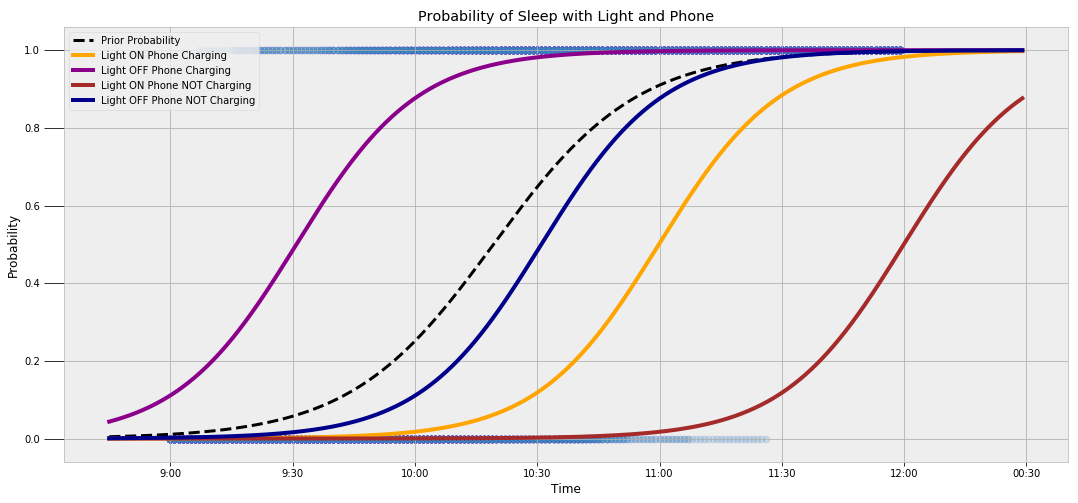

In [27]:
figsize(18, 8)

plt.plot(time_est, sleep_est, color = 'black', 
         lw=3, linestyle = '--', label="Prior Probability")
plt.plot(time_est, light_phone, color = 'orange', lw = 4, 
         label = 'Light ON Phone Charging')
plt.plot(time_est, nolight_phone, color = 'darkmagenta', lw = 4,
         label = 'Light OFF Phone Charging')
plt.plot(time_est, light_nophone, color = 'brown', lw= 4,
         label = 'Light ON Phone NOT Charging')
plt.plot(time_est, nolight_nophone, color = 'darkblue', lw = 4,
         label = 'Light OFF Phone NOT Charging')
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=50, alpha=0.2)
plt.legend(loc=2); plt.xlabel('Time'); plt.ylabel('Probability')
plt.title('Probability of Sleep with Light and Phone');
plt.xticks([-60, -30, 0, 30, 60, 90, 120, 150], sleep_labels);